In [1]:
import pandas as pd
import scipy.stats as sts
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Первая часть

In [2]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.columns[:5]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'],
      dtype='object')

#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [5]:
n = df['mean symmetry'].shape[0]

mean = np.sum(df['mean symmetry'])/n
print(f'Выборочное среднее: {mean:.6f}')

Выборочное среднее: 0.181162


In [21]:
s_sq = np.sum((df['mean symmetry'] - mean)**2)/(n-1)
print(f'Выборочная дисперсия: \t\t\t{s_sq:.6f}')
print(f'Выборочное стандартное отклонение: \t{s_sq**0.5:.6f}')

Выборочная дисперсия: 			0.006663
Выборочное стандартное отклонение: 	0.081630


In [22]:
from collections import Counter

df_count = Counter(df['mean symmetry']).most_common()
max_n = df_count[0][1]
mode = []

for x in df_count: 
    if x[1] == max_n:
        mode.append(x[0])
    else:
        break
print(f'Моды: \t{mode}')

Моды: 	[0.1769, 0.1717, 0.1893, 0.1714, 0.1601]


In [23]:
x = np.array(df['mean symmetry'].sort_values())
n = len(df['mean symmetry'])

if n%2 == 0:
    med = (x[n//2-1] + x[n//2])/2
    X25 = x[n//4]
    X75 = x[3*n//4]
else:
    med = x[n//2]
    X25 = x[n//4]
    X75 = x[3*n//4]

IQR = X75 - X25
print(f'Интерквартильный размах: \t{IQR:.6f}')
print(f'Медиана: \t\t\t{med:.6f}')

Интерквартильный размах: 	0.033800
Медиана: 			0.179200


In [24]:
df['mean symmetry'].describe()

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: mean symmetry, dtype: float64

#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

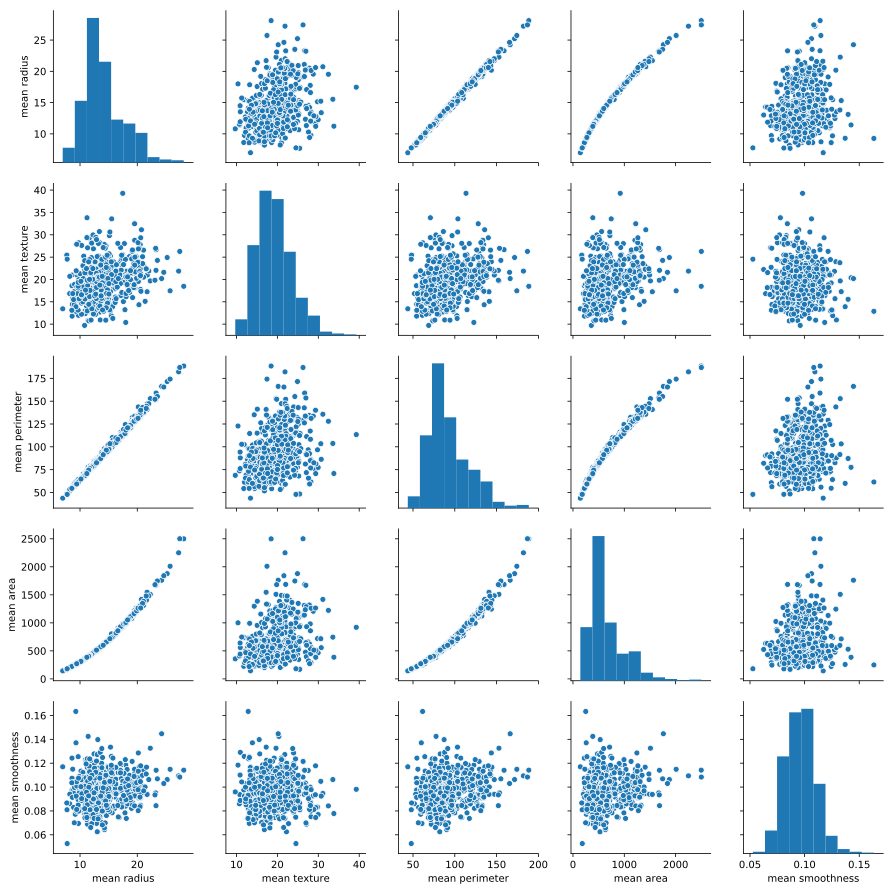

In [25]:
sns.pairplot(df, vars=df.columns[:5],
                 kind='scatter') 

Наиболее зависимые пары: <br>
'mean perimeter' - 'mean radius', <br>
'mean perimeter' - 'mean area', <br>
'mean area' - 'mean radius', <br>

Наиболее независимые пары: <br>
все остальные пары на глаз приблизительно одинаково независимы

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

In [26]:
corr = df.iloc[:, :5].corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean area,0.987357,0.321086,0.986507,1.000000,0.177028
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


In [27]:
cor_pairs = np.abs(corr).stack().nlargest(6)[5:6]
most_cor_pairs = [cor_pairs.index.get_level_values(i).tolist()[0] for i in range(2)]
print(f'Пара наиболее зависимых признаков: \n{most_cor_pairs[0]} - {most_cor_pairs[1]}')

Пара наиболее зависимых признаков: 
mean radius - mean perimeter


In [28]:
not_cor_pairs = np.abs(corr).stack().nsmallest(1)[:1]
least_cor_pairs = [not_cor_pairs.index.get_level_values(i).tolist()[0] for i in range(2)]
print(f'Пара наименее зависимых признаков: \n{least_cor_pairs[0]} - {least_cor_pairs[1]}')

Пара наименее зависимых признаков: 
mean texture - mean smoothness


#### Проверить найденные пары t-тестом

In [29]:
sts.ttest_ind(df['mean radius'], df['mean perimeter'])

Ttest_indResult(statistic=-75.62417662792113, pvalue=0.0)

In [30]:
sts.ttest_ind(df['mean texture'], df['mean smoothness'])

Ttest_indResult(statistic=106.44619509686147, pvalue=0.0)

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [32]:
M = 0
mean = df['mean compactness'].mean()
n = df['mean compactness'].shape[0]
SE = (df['mean compactness'].var()/n)**0.5
z = (mean - M)/SE
p = (1 - sts.norm.cdf(abs(z)))*2
print(f'z = {z}, p = {p}')

z = 47.12726263249827, p = 0.0


Т.к. z = 47 - p value черезвычайно мало. Т.е. различия значимы и мы отвергаем гипотезу $H_0$ и принимаем альтернативную, что $M_{mean\ compactness} \neq 0$

#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

Text(0.5,0,'worst texture')

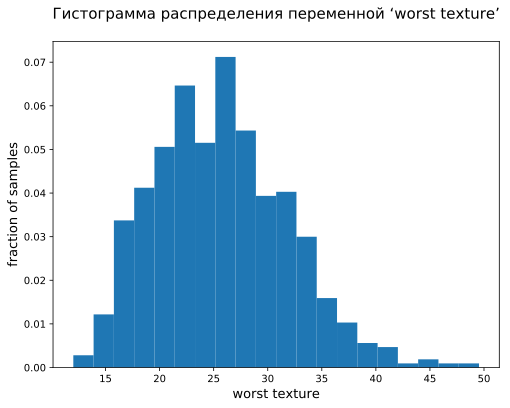

In [33]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,6))
plt.hist(df['worst texture'], bins=20, density=True)
plt.title("Гистограмма распределения переменной ‘worst texture’\n", fontsize=15)
plt.ylabel('fraction of samples', fontsize=13)
plt.xlabel('worst texture', fontsize=13)

Text(0.5,0,'worst texture')

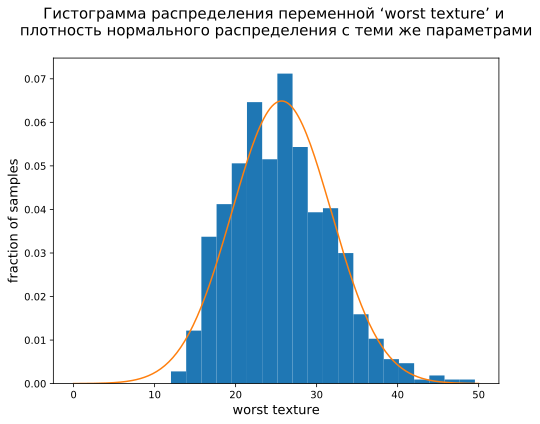

In [34]:
plt.figure(figsize=(8,6))
w_t = df['worst texture']
x = np.linspace(0, 50, 201)
pdf = sts.norm(w_t.mean(), w_t.var()**0.5).pdf(x)
plt.hist(w_t, bins=20, density=True)
plt.plot(x, pdf)
plt.title("Гистограмма распределения переменной ‘worst texture’ и \n\
плотность нормального распределения с теми же параметрами\n", fontsize=15)
plt.ylabel('fraction of samples', fontsize=13)
plt.xlabel('worst texture', fontsize=13)

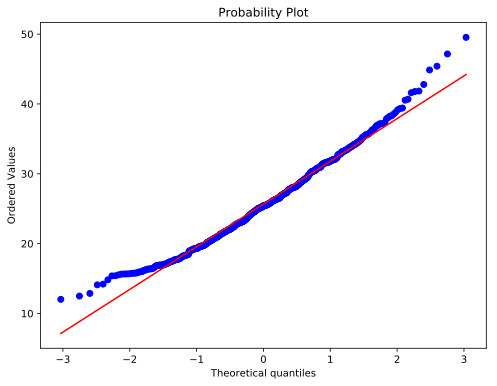

In [35]:
plt.figure(figsize=(8,6))
res = sts.probplot(w_t, plot=plt)

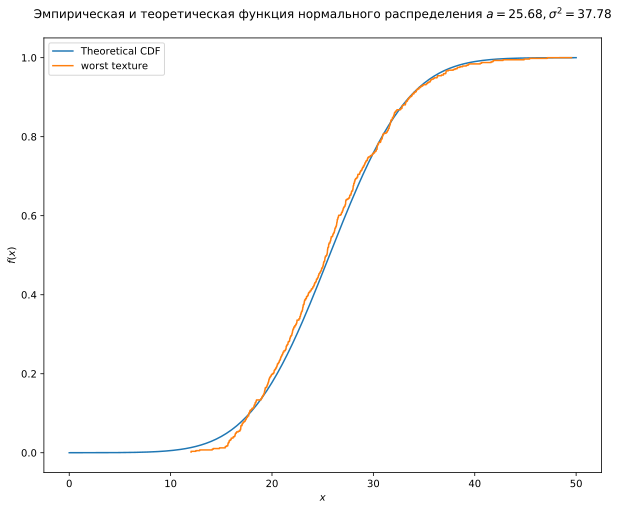

In [36]:
cdf = sts.norm(w_t.mean(), w_t.var()**0.5).cdf(x)

plt.figure(figsize=(10,8))
plt.plot(x, cdf, label='Theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(w_t)
plt.step(ecdf.x, ecdf.y, label='worst texture')

plt.title(f"Эмпирическая и теоретическая функция нормального распределения \
$a={w_t.mean():.2f}, \sigma^2={w_t.var():.2f}$\n")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

In [45]:
N = 1000
K = 10000
poisson_rv = sts.poisson(mu=2)
sample = poisson_rv.rvs(N*K)

In [46]:
matrix = sample.reshape(N, K)
matrix.shape

(1000, 10000)

In [47]:
mean_sample = np.array(
    [matrix[:i,:].mean() for i in range(2, N)]
    )

In [48]:
print(f'Среднее выборочное выборочных средних: {mean_sample.mean():.5f}')

Среднее выборочное выборочных средних: 2.00000


In [49]:
var_sample = np.array([matrix[:i, :].var(ddof=1) for i in range(2, N)])

In [50]:
print(f'Среднее выборочное исправленных выборочных дисперсий: {var_sample.mean():.5f}')

Среднее выборочное исправленных выборочных дисперсий: 1.99954


In [51]:
mean_sample_n = [mean_sample[:i].mean() for i in range(1, len(mean_sample))]
var_sample_n = [var_sample[:i].mean() for i in range(1, len(var_sample))]

Text(0.5,0,'$n$')

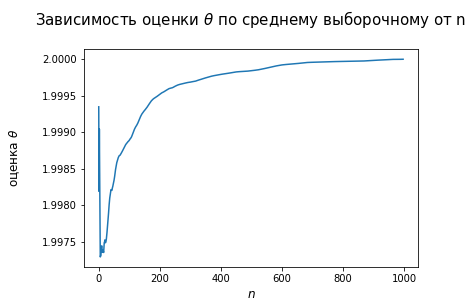

In [68]:
x = list(range(len(mean_sample_n)))

plt.plot(x, mean_sample_n)
plt.title('Зависимость оценки $\\theta$ по среднему выборочному от n\n', fontsize=15)
plt.ylabel('оценка $\\theta$\n', fontsize=12)
plt.xlabel('$n$', fontsize=12)

Text(0.5,0,'$n$')

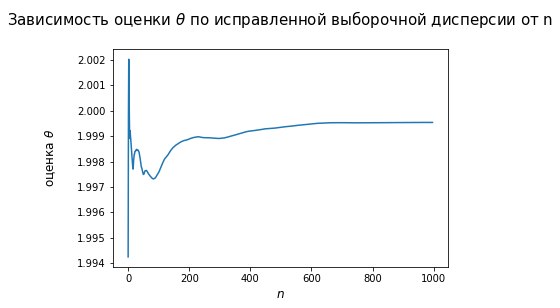

In [69]:
plt.plot(x, var_sample_n)

plt.title('Зависимость оценки $\\theta$ по исправленной выборочной дисперсии от n\n', fontsize=15)
plt.ylabel('оценка $\\theta$\n', fontsize=12)
plt.xlabel('$n$', fontsize=12)

In [70]:
sigma_mean_sample_n = [mean_sample[:i].var() for i in range(1, len(mean_sample))]
sigma_var_sample_n = [var_sample[:i].var() for i in range(1, len(var_sample))]

Text(0.5,0,'$n$')

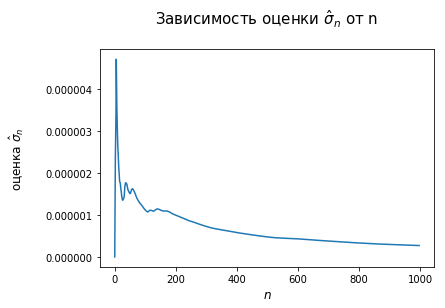

In [71]:
plt.plot(x, sigma_mean_sample_n)
plt.title('Зависимость оценки $\hat{\sigma}_n$ от n\n', fontsize=15)
plt.ylabel('оценка $\hat{\sigma}_n$\n', fontsize=12)
plt.xlabel('$n$', fontsize=12)

Text(0.5,0,'$n$')

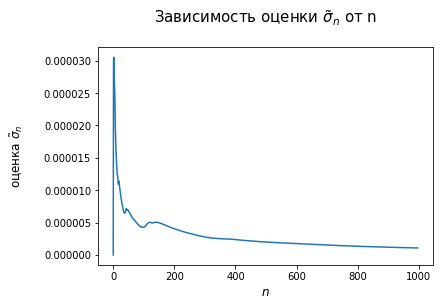

In [72]:
plt.plot(x, sigma_var_sample_n)
plt.title('Зависимость оценки $\\tilde{\sigma}_n$ от n\n', fontsize=15)
plt.ylabel('оценка $\\tilde{\sigma}_n$\n', fontsize=12)
plt.xlabel('$n$', fontsize=12)